# **Objective:-  Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.**

Link to dataset:-https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Step 1:- Import all the necessary libraries.

**Keras API**:- Keras is a high-level neural networks API that is built on top of TensorFlow (and can also run on other deep learning frameworks such as Theano or Microsoft Cognitive Toolkit). It provides a user-friendly interface and abstracts away many complexities of building deep learning models, making it easier to quickly prototype and develop neural networks.

Tensorflow:- TensorFlow is a popular open-source library developed by Google for deep learning and machine learning tasks. It provides a flexible and comprehensive ecosystem of tools, libraries, and resources that help researchers and developers build and deploy various deep learning models.

In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix

Step 2:- Read the dataset

In [42]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Check for duplicate values

In [44]:
print(df.duplicated().sum())
df.shape

0


(10000, 14)

## **Distinguish feature and target set**

In [45]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [46]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [47]:
df.shape

(10000, 14)

In [48]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [49]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [50]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [51]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# We are performing one-hot encoding on the categorical variables in the feature set X.

One-hot encoding is a technique used to represent categorical variables as binary vectors. It creates new binary columns for each unique category in a categorical variable and assigns a value of 1 or 0 to indicate the presence or absence of a particular category.

In [52]:
X_data = pd.get_dummies(X, columns=["Geography", "Gender"])
X_data.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2079,562,45,6,136855.24,1,1,0,46864.00,1,0,0,0,1
3261,614,51,3,0.00,2,1,1,5552.37,1,0,0,0,1
6806,478,35,1,92474.05,1,1,0,178626.07,1,0,0,0,1
8311,555,42,6,107104.50,1,1,1,41304.44,0,1,0,0,1
3094,480,25,3,174330.35,2,0,0,181647.13,0,1,0,1,0
8684,813,27,6,111348.15,1,1,0,46422.46,0,1,0,0,1
7253,779,55,0,133295.98,1,1,0,22832.71,0,0,1,1,0
6450,834,28,6,0.00,1,1,0,74287.53,1,0,0,1,0
5807,679,33,9,112528.65,2,1,0,177362.45,1,0,0,1,0
5181,661,35,5,128415.45,1,1,0,142626.49,0,0,1,1,0


In [53]:
X_data.shape

(10000, 13)

## **Split the data up in train and test sets**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Creating the Model

**Sequential():-** It is a class in Keras that represents a linear stack of layers for building neural network models. The Sequential model allows you to add layers to it in a sequential manner, one after the other.

In [56]:
# Initialize the model
model = keras.Sequential()

# **Adding layers [layers and activations]**

1.**model.add()**:-Layer that adds a list of inputs.
It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
2.**units=8**:- It specifies the number of neurons in the Dense layer. In this case, the Dense layer will have 8 neurons. The number of units/neurons is a hyperparameter that you can adjust based on your specific problem and the complexity of the data.
3.**input_dim=13**:- It defines the input dimension or the number of features in the input data. In this case, the input data should have 13 features.
4.**activation="relu":-** It sets the activation function for the neurons in this Dense layer. The activation function is responsible for introducing non-linearity into the neural network, allowing it to learn complex patterns in the data. "relu" stands for Rectified Linear Unit, which is a commonly used activation function. It returns 0 for negative inputs and the input value itself for positive inputs.
5.activation-"sigmoid":-The third layer, specified by model.add(layers.Dense(units=1, activation='sigmoid')), represents the output layer of the model. It has a single neuron (unit) and uses the sigmoid activation function. The sigmoid activation function ensures that the output of the neuron is between 0 and 1, representing the probability of the sample belonging to the positive class.

In [57]:
from keras.layers import Dense
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=8, input_dim=13, activation="relu"))  # input of 13 columns
# hidden layer
model.add(Dense(units=16, activation="relu"))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation="sigmoid"))


In [58]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**model.compile()**:-It is used to configure the compilation step of a neural network model for a binary classification problem.

**1.optimizer='adam':-** It specifies the optimizer algorithm to be used during the training of the model. The optimizer determines how the model's weights are updated based on the loss function and the gradients computed during backpropagation. "Adam" is a popular optimization algorithm that adapts the learning rate dynamically and combines techniques from both gradient descent and RMSprop.

**2.loss='binary_crossentropy':-** It defines the loss function to be used for training the model. In binary classification problems, where the output is either 0 or 1, "binary_crossentropy" is commonly used as the loss function. It measures the dissimilarity between the predicted probabilities and the true labels and guides the model to minimize this dissimilarity. The binary cross-entropy loss is well-suited for problems where each input sample belongs to a single class.

**3.metrics=['accuracy']:-** It specifies the evaluation metric(s) to be used to monitor the performance of the model during training and evaluation. In this case, "accuracy" is used as the metric. Accuracy measures the proportion of correctly predicted samples out of the total number of samples. It is a commonly used metric for classification tasks. By specifying metrics=['accuracy'], the model will calculate and report the accuracy during training and evaluation.

In [59]:
# print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [60]:
# fitting the model
history = model.fit(X_train, y_train, batch_size=15, epochs=20, validation_split=0.2)

Epoch 1/20
427/427 [==============================] - 2s 3ms/step - loss: 0.4996 - accuracy: 0.7909 - val_loss: 0.4587 - val_accuracy: 0.7987
Epoch 2/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.7933 - val_loss: 0.4356 - val_accuracy: 0.7981
Epoch 3/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4405 - accuracy: 0.7952 - val_loss: 0.4247 - val_accuracy: 0.8087
Epoch 4/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8064 - val_loss: 0.4170 - val_accuracy: 0.8156
Epoch 5/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4205 - accuracy: 0.8120 - val_loss: 0.4102 - val_accuracy: 0.8206
Epoch 6/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8175 - val_loss: 0.4044 - val_accuracy: 0.8306
Epoch 7/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8272 - val_loss: 0.3933 - val_accuracy: 0.8344
Epoch 

**model.fit():-** It is used to train the neural network model on the training data.The function trains the model using the specified training data, batch size, and number of epochs. During training, it computes the loss and updates the model's weights based on the optimization algorithm and the backpropagation process. The validation set is used to evaluate the model's performance at the end of each epoch.

**1.X_train:-** It represents the input features (independent variables) of the training data. This is a numpy array or a pandas DataFrame containing the training samples.

**2.y_train:-** It represents the target variable (dependent variable) of the training data. This is a numpy array or a pandas Series containing the corresponding labels for the training samples.

**3.batch_size=15:- **It specifies the number of samples to be used in each batch during training. The training data is divided into batches, and the model's weights are updated after processing each batch. A smaller batch size requires less memory but may result in slower training.

**4.epochs=20:-** It defines the number of times the entire training dataset is passed through the model during training. Each epoch consists of one forward pass (prediction) and one backward pass (weight update). Increasing the number of epochs allows the model to learn from the data for a longer duration, but too many epochs can lead to overfitting.

5.validation_split=0.2:- It indicates the proportion of the training data that should be used for validation. In this case, 20% of the training data will be used as a validation set to evaluate the model's performance during training. The validation set helps to monitor the model's generalization ability and detect overfitting.



## **Evaluation**

In [61]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8535


In [63]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

63/63 [==============================] - 0s 1ms/step
Accuracy: 0.8535
Confusion Matrix:
[[1531   76]
 [ 217  176]]


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC score:", roc_auc)


63/63 [==============================] - 0s 1ms/step
Accuracy: 0.8535
Precision: 0.6984126984126984
Recall: 0.44783715012722647
F1-score: 0.5457364341085271
ROC-AUC score: 0.8506454743955753


## **Plotting the graph between Val_loss and Epochs.**

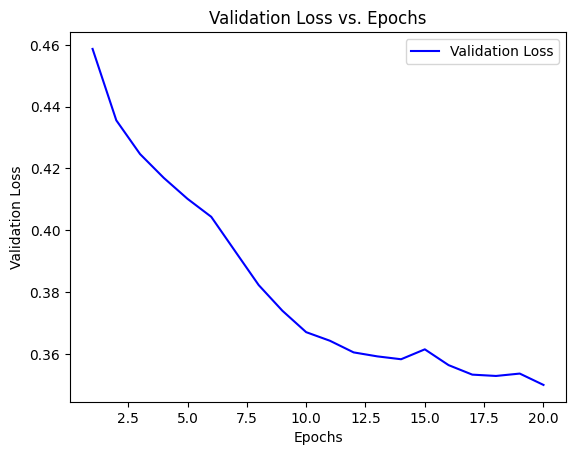

In [65]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['val_loss']) + 1)
val_loss = history.history['val_loss']

plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


## **Plotting the graph between Accuracy and Epochs.**

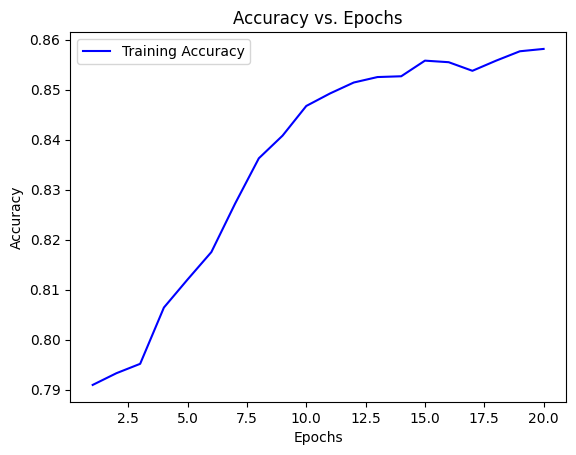

In [69]:
import matplotlib.pyplot as plt

accuracy_scores = history.history['accuracy']

epochs = range(1, len(accuracy_scores) + 1)

plt.plot(epochs, accuracy_scores, 'b', label='Training Accuracy')

plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

